In [101]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [102]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [103]:
pip install deap

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


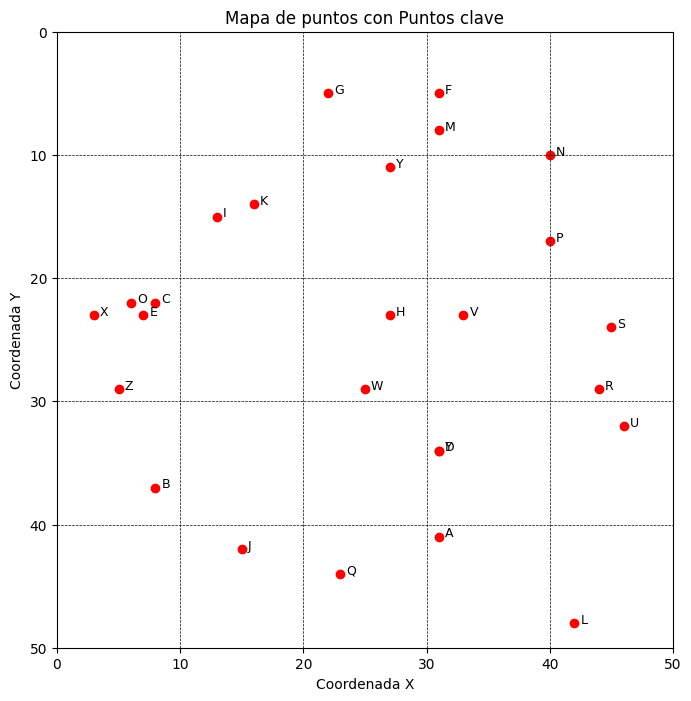

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.spatial import distance

# Crear una matriz 50x50 (rellena de ceros)
matriz = np.zeros((50, 50))

# Cargar el archivo CSV con los 26 puntos importantes
archivo_csv = 'input/Factor_Distancia(Coordenadas).csv'
df_coordenadas = pd.read_csv(archivo_csv, delimiter=';')

# Asignar las columnas 'x' y 'y' y los nombres de los puntos
puntos = df_coordenadas['Puntos']
x_coordenadas = df_coordenadas['x']
y_coordenadas = df_coordenadas['y']

# Crear la figura y la cuadrícula 50x50
plt.figure(figsize=(8, 8))

# Mostrar la matriz, pero con un fondo transparente para que no afecte el fondo blanco
plt.imshow(matriz, cmap='gray', alpha=0)  # Fondo transparente

# Establecer los límites y mantener el fondo blanco
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.gca().set_facecolor('white')  # Fondo blanco
plt.gca().invert_yaxis()
# Mostrar la cuadrícula
plt.grid(True, linestyle='--', linewidth=0.5, color='black')

# Graficar los puntos importantes encima de la cuadrícula
plt.scatter(x_coordenadas, y_coordenadas, color='red', label='Puntos Importantes')

# Agregar etiquetas a cada punto
for i in range(len(puntos)):
    plt.text(x_coordenadas[i] + 0.5, y_coordenadas[i] , puntos[i], fontsize=9, ha='left')


# Etiquetas y título
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Mapa de puntos con Puntos clave')

# Mostrar el gráfico
plt.show()


El punto inicial seleccionado al azar es: Z


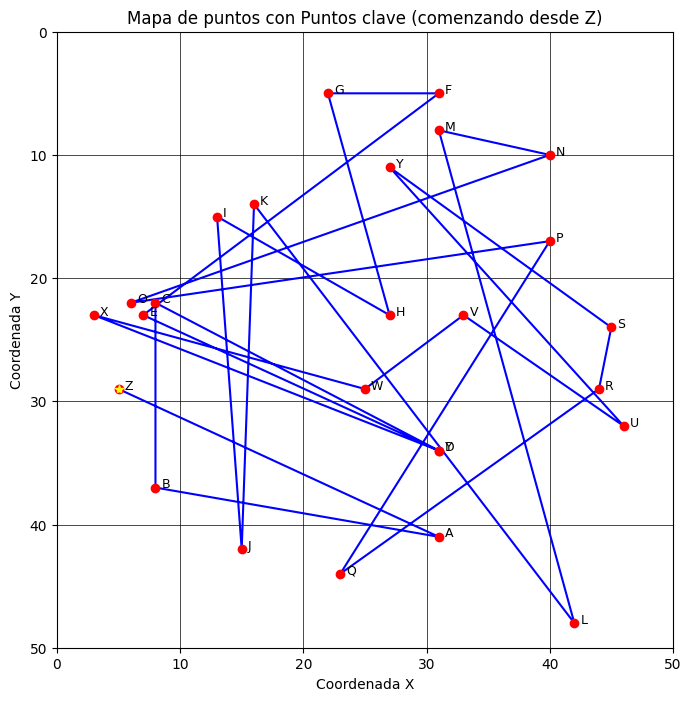

In [105]:
# Seleccionar un punto al azar o indicar el punto inicial de la ruta
indice_aleatorio = np.random.randint(0, len(puntos))
punto_inicial = puntos[indice_aleatorio]
print(f"El punto inicial seleccionado al azar es: {punto_inicial}")

# Reordenar los puntos comenzando desde el punto seleccionado al azar
puntos_reordenados = pd.concat([puntos[indice_aleatorio:], puntos[:indice_aleatorio]])
x_reordenados = pd.concat([x_coordenadas[indice_aleatorio:], x_coordenadas[:indice_aleatorio]])
y_reordenados = pd.concat([y_coordenadas[indice_aleatorio:], y_coordenadas[:indice_aleatorio]])

# Crear la figura y la cuadrícula 50x50
plt.figure(figsize=(8, 8))

# Mostrar la matriz, pero con un fondo transparente para que no afecte el fondo blanco
plt.imshow(matriz, cmap='gray', alpha=0)  # Fondo transparente

# Establecer los límites y mantener el fondo blanco
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.gca().set_facecolor('white')  # Fondo blanco
plt.gca().invert_yaxis()

# Mostrar la cuadrícula
plt.grid(True, linestyle='-', linewidth=0.5, color='black')

# Dibujar líneas que conecten los puntos reordenados
plt.plot(x_reordenados, y_reordenados, color='blue', linestyle='-', marker='o', markerfacecolor='red', markeredgecolor='red')

# Agregar etiquetas a cada punto
for i in range(len(puntos_reordenados)):
    plt.text(x_reordenados.iloc[i] + 0.5, y_reordenados.iloc[i] , puntos_reordenados.iloc[i], fontsize=9, ha='left')

#Dibujar punto inicial
plt.plot(x_reordenados[indice_aleatorio], y_reordenados[indice_aleatorio], color='yellow', marker='*')

# Etiquetas y título
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title(f'Mapa de puntos con Puntos clave (comenzando desde {punto_inicial})')

# Mostrar el gráfico
plt.show()


Ant Colony Tradicional:

In [106]:
# Parámetros del algoritmo
num_hormigas = 10
num_iteraciones = 100
alfa = 1.0  # Influencia de las feromonas
beta = 2.0  # Influencia de la visibilidad (1/distancia)
evaporacion = 0.5  # Factor de evaporación de las feromonas
intensidad_feromona = 100.0  # Cuánto feromona se deposita en los mejores caminos

# Crear una lista de coordenadas (pares de x e y)
coordenadas = np.array(list(zip(x_coordenadas, y_coordenadas)))
num_puntos = len(coordenadas)

# Inicializar la matriz de distancias
distancias = np.zeros((num_puntos, num_puntos))

# Calcular las distancias entre cada par de puntos
for i in range(num_puntos):
    for j in range(num_puntos):
        distancias[i, j] = np.linalg.norm(coordenadas[i] - coordenadas[j])

# Inicializar feromonas en las aristas
feromonas = np.ones((num_puntos, num_puntos))

# Función de visibilidad (1 / distancia)
visibilidad = 1 / (distancias + 1e-10)  # Para evitar divisiones por cero

# Función para elegir el siguiente punto
def elegir_siguiente_punto(hormiga_actual, no_visitados):
    numeradores = (feromonas[hormiga_actual, no_visitados] ** alfa) * (visibilidad[hormiga_actual, no_visitados] ** beta)
    probabilidades = numeradores / numeradores.sum()
    return np.random.choice(no_visitados, p=probabilidades)

# Obtener el índice del punto inicial en la lista de puntos
indice_punto_inicial = puntos.tolist().index(punto_inicial)

# Estadísticas
tiempos_por_hormiga = []
costos_de_caminos_distancia = [] #Distancia
cantidad_viajes = 0

# Algoritmo de colonia de hormigas
mejor_camino = None
mejor_longitud = np.inf

tiempo_total = time.time()  # Iniciar cronómetro para tiempo total

for _ in range(num_iteraciones):
    todos_los_caminos = []
    longitudes_caminos = []

    # Cada hormiga construye una solución
    for _ in range(num_hormigas):
        cantidad_viajes += 1
        no_visitados = list(range(num_puntos))
        hormiga_actual = indice_punto_inicial  # El punto inicial predefinido
        no_visitados.remove(hormiga_actual)  # Eliminar el punto inicial de los no visitados
        camino = [hormiga_actual]

        tiempo_inicio_hormiga = time.time()  # Cronómetro para cada hormiga

        while no_visitados:
            siguiente = elegir_siguiente_punto(hormiga_actual, no_visitados)
            camino.append(siguiente)
            no_visitados.remove(siguiente)
            hormiga_actual = siguiente

        tiempo_fin_hormiga = time.time()  # Finaliza el cronómetro para la hormiga
        tiempo_hormiga = tiempo_fin_hormiga - tiempo_inicio_hormiga
        tiempos_por_hormiga.append(tiempo_hormiga)

        # Calcular la longitud del camino
        longitud_camino = sum(distancias[camino[i], camino[i + 1]] for i in range(num_puntos - 1))
        todos_los_caminos.append(camino)
        longitudes_caminos.append(longitud_camino)
        costos_de_caminos_distancia.append(longitud_camino)

        # Actualizar el mejor camino encontrado
        if longitud_camino < mejor_longitud:
            mejor_camino = camino
            mejor_longitud = longitud_camino

    # Actualización de feromonas
    feromonas *= (1 - evaporacion)  # Evaporación de feromonas

    for i in range(num_hormigas):
        camino = todos_los_caminos[i]
        longitud = longitudes_caminos[i]
        # Incremento de feromonas en las aristas del camino
        for j in range(num_puntos - 1):
            feromonas[camino[j], camino[j + 1]] += intensidad_feromona / longitud

# Finalizar cronómetro para tiempo total
tiempo_total = time.time() - tiempo_total

# Estadísticas de tiempos y costos
tiempo_promedio_hormiga = np.mean(tiempos_por_hormiga)
costo_promedio_distancia = np.mean(costos_de_caminos_distancia)
desviacion_estandar_distancia = np.std(costos_de_caminos_distancia)

# Mostrar el mejor camino
nombres_puntos = puntos[mejor_camino].tolist()  # Nombres de los puntos en el mejor camino
print(f"El mejor camino es {nombres_puntos} con una longitud de {mejor_longitud:.4f}")
print(f"Tiempo total: {tiempo_total:.2f} segundos")
print(f"Tiempo promedio por hormiga: {tiempo_promedio_hormiga:.4f} segundos")
print(f"Cantidad de viajes realizados: {cantidad_viajes}")
print(f"Cantidad de hormigas usadas: {num_hormigas}")
print(f"Distancia promedio de los caminos: {costo_promedio_distancia:.4f}")
print(f"Desviación estándar de las distancias: {desviacion_estandar_distancia:.4f}")

# Justificación del mejor camino
if desviacion_estandar_distancia != 0:
    desviacion_mejor_camino = (mejor_longitud - costo_promedio_distancia) / desviacion_estandar_distancia
    print(f"El mejor camino encontrado tiene una distancia de {mejor_longitud:.4f}, lo que es {'%.2f' % desviacion_mejor_camino} desviaciones estándar por debajo del promedio.")
else:
    print(f"El mejor camino encontrado tiene una distancia de {mejor_longitud:.4f}, sin desviación estándar calculable (todas las hormigas tuvieron el mismo costo).")


El mejor camino es ['Z', 'X', 'O', 'E', 'C', 'K', 'I', 'G', 'Y', 'M', 'F', 'N', 'P', 'S', 'R', 'U', 'L', 'A', 'Y', 'D', 'V', 'H', 'W', 'Q', 'J', 'B'] con una longitud de 182.6747
Tiempo total: 0.99 segundos
Tiempo promedio por hormiga: 0.0010 segundos
Cantidad de viajes realizados: 1000
Cantidad de hormigas usadas: 10
Distancia promedio de los caminos: 206.9021
Desviación estándar de las distancias: 26.0174
El mejor camino encontrado tiene una distancia de 182.6747, lo que es -0.93 desviaciones estándar por debajo del promedio.


El costo manejado en el argoritmo tradicional es en terminos de longitud, a mayor longitud mayor costo tiene dicho camino.

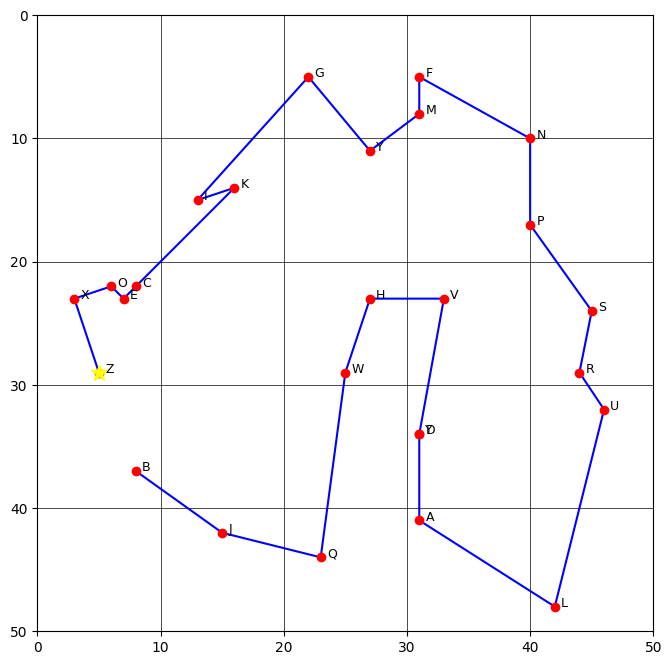

In [107]:
# Crear la matriz de 50x50 (en tu caso, puedes haberla calculado previamente)
matriz = np.zeros((50, 50))  # Si tienes datos para la matriz, puedes reemplazar esto

# Crear la figura y la cuadrícula 50x50
plt.figure(figsize=(8, 8))

# Mostrar la matriz con fondo transparente
plt.imshow(matriz, cmap='gray', alpha=0)  # Fondo transparente para la matriz

# Establecer los límites de la cuadrícula
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.gca().set_facecolor('white')  # Fondo blanco
plt.gca().invert_yaxis()

# Mostrar la cuadrícula
plt.grid(True, linestyle='-', linewidth=0.5, color='black')

# Extraer las coordenadas x e y reordenadas según el mejor camino
x_reordenados = [x_coordenadas[i] for i in mejor_camino]  # Coordenadas x del mejor camino
y_reordenados = [y_coordenadas[i] for i in mejor_camino]  # Coordenadas y del mejor camino
puntos_reordenados = [puntos[i] for i in mejor_camino]  # Nombres de los puntos en el mejor camino

# Dibujar líneas que conecten los puntos reordenados
plt.plot(x_reordenados, y_reordenados, color='blue', linestyle='-', marker='o', 
         markerfacecolor='red', markeredgecolor='red')

# Agregar etiquetas a cada punto
for i in range(len(puntos_reordenados)):
    plt.text(x_reordenados[i] + 0.5, y_reordenados[i], puntos_reordenados[i], fontsize=9, ha='left')

# Dibujar el punto inicial con un marcador especial
plt.plot(x_reordenados[0], y_reordenados[0], color='yellow', marker='*', markersize=12)

# Mostrar el gráfico final
plt.show()


**Ant Colonny no estocástico**

In [108]:
#Importacion de los factores - Altitud
#La inclinacion se da en factor de grados de inclinacion (la simulación puede ser entre -35 a 35 grados)
# Se con las pendientes entre cada punto se puede analizar su nivel de dificultad, se tomara un incremento o decremento lineal

archivo_inclinacion = 'input/Variable_Altitud.csv'
df_altitud = pd.read_csv(archivo_inclinacion, delimiter=';')

df_altitud.set_index('y|x', inplace=True)

df_altitud.columns = df_altitud.columns.astype(int) 




def tamaño_matriz():
    return df_altitud.shape

# Función para obtener el valor en la coordenada (x, y)
def obtener_valor_altitud(x, y):
    try:
        valor = df_altitud.at[y, x]
        return valor
    except KeyError:
        return "Coordenada no válida"     


In [109]:
#Importacion de los factores - Terreno
#Se toman 23 diferentes tipos de terreno y se obtiene la dificultad de cada uno de ellos
#No hay factores de descicion la dificultad es empirica hasta el momento


descripcion_tipos_de_terreno = {
    1: "Asfalto: Superficie pavimentada común en carreteras y calles urbanas. Fácil de transitar para todos los vehículos.",
    2: "Caminos de adoquines: Superficie de piedras pequeñas, común en áreas urbanas antiguas. Transitable con cierta incomodidad para algunos vehículos.",
    3: "Caminos de grava compactada: Superficie de grava apisonada, más estable que la grava suelta. Fácil de transitar para la mayoría de los vehículos.",
    4: "Grava: Pequeñas piedras sueltas, a menudo utilizadas en caminos rurales. Puede ser algo incómodo para algunos vehículos.",
    5: "Pradera: Áreas planas o ligeramente onduladas, con pastos y pocos árboles. Transitable para vehículos todoterreno y algunos vehículos convencionales.",
    6: "Tierra: Camino de suelo desnudo, puede estar compactado o suelto. Dependiendo de la compactación, puede ser fácil o complicado transitar.",
    7: "Hierba: Áreas cubiertas de césped o pasto. Transitable para algunos vehículos, aunque puede ser resbaladizo en condiciones húmedas.",
    8: "Terreno agrícola: Campos de cultivo, que pueden variar en textura y estabilidad. Transitable si está seco, complicado si está húmedo o trabajado recientemente.",
    9: "Colinas: Terreno ondulado, con subidas y bajadas. Fácil en pendientes leves, más complicado en pendientes empinadas.",
    10: "Valle: Áreas bajas entre colinas o montañas, a menudo con un río o arroyo. Transitable, pero puede tener áreas más complejas si hay ríos o terrenos irregulares.",
    11: "Bosque: Terreno boscoso, con raíces de árboles y vegetación densa. Vehículos todoterreno pueden transitarlo, pero hay obstáculos naturales.",
    12: "Senderos de montaña: Caminos estrechos y empinados, a menudo con terreno irregular. Dificultad considerable para vehículos convencionales.",
    13: "Arena: Terreno arenoso, común en áreas costeras y desiertos. Difícil para vehículos no preparados.",
    14: "Desierto: Terreno árido y seco, con poca vegetación. Similar a la arena, difícil para la mayoría de los vehículos.",
    15: "Barro: Terreno fangoso, especialmente después de lluvias. Muy difícil de transitar si no se tiene un vehículo especializado.",
    16: "Pantano: Área húmeda y lodosa, con agua estancada y vegetación específica. Vehículos pueden atascarse fácilmente.",
    17: "Hielo: Superficie congelada, muy resbaladiza. Alta dificultad debido al riesgo de pérdida de tracción.",
    18: "Nieve: Terreno cubierto de nieve, común en áreas montañosas durante el invierno. Difícil, aunque vehículos con tracción especial pueden transitarlo.",
    19: "Roca: Superficies rocosas, que pueden ser lisas o irregulares. Altamente difícil, dependiendo de la irregularidad del terreno.",
    20: "Montaña: Áreas elevadas con terrenos rocosos y empinados. Muy difícil de transitar, requiere vehículos muy especializados.",
    21: "Pico de Montaña: Área elevada en la cima de una montaña, típicamente cubierta de nieve durante gran parte del año. El terreno es empinado, rocoso y con nieve acumulada, lo que dificulta el tránsito. Las bajas temperaturas y el hielo aumentan el riesgo de deslizamientos, y solo vehículos especializados o equipos de escalada pueden acceder a estos terrenos. Es extremadamente difícil de transitar y peligroso, especialmente durante tormentas o en invierno.",
    22: "Río: Cuerpo de agua en movimiento. Solo vehículos anfibios o puentes permiten cruzarlo.",
    23: "Lago: Cuerpo de agua. Intransitable para vehículos terrestres, a menos que sean anfibios.",
    24: "Quebrada: Cuerpo de agua pequeño o arroyo. Difícil de cruzar si no hay puentes o acceso adecuado."
}

dificultad_tipos_de_terreno = {
    1: 0,  # Asfalto: Muy fácil de transitar.
    2: 1,  # Caminos de adoquines: Ligera incomodidad, pero transitable.
    3: 1,  # Caminos de grava compactada: Fácil de transitar.
    4: 2,  # Grava: Incomodo para algunos vehículos, pero transitable.
    5: 2,  # Pradera: Transitable pero puede haber pequeñas dificultades.
    6: 2,  # Tierra: Depende de la compactación, puede ser algo complicado.
    7: 2,  # Hierba: Transitable, pero puede ser resbaladizo si está húmedo.
    8: 3,  # Terreno agrícola: Puede ser complicado si está húmedo o trabajado recientemente.
    9: 2,  # Colinas: Pendientes leves son fáciles, pero pendientes empinadas pueden ser complicadas.
    10: 2,  # Valle: Transitable, pero puede tener áreas irregulares con ríos.
    11: 3,  # Bosque: Obstáculos naturales como raíces y vegetación densa pueden complicar el tránsito.
    12: 3,  # Senderos de montaña: Caminos estrechos y empinados, más complicado para vehículos.
    13: 3,  # Arena: Difícil para vehículos no preparados.
    14: 3,  # Desierto: Similar a la arena, pero la falta de vegetación puede facilitar el tránsito.
    15: 4,  # Barro: Muy difícil si no se cuenta con vehículos especializados.
    16: 4,  # Pantano: Muy difícil debido al terreno húmedo y lodoso, riesgo de atascarse.
    17: 5,  # Hielo: Extremadamente difícil por el riesgo de pérdida de tracción.
    18: 4,  # Nieve: Difícil sin tracción especial, aunque transitable en algunos casos.
    19: 4,  # Roca: Depende de la superficie rocosa, pero en general es difícil.
    20: 5,  # Montaña: Muy difícil, con pendientes pronunciadas y terreno irregular.
    21: 5,  # Pico de Montaña: Extremadamente difícil, con nieve y hielo en un terreno empinado y rocoso.
    22: 5,  # Río: Intransitable a menos que haya puentes o vehículos anfibios.
    23: 5,  # Lago: Intransitable para vehículos terrestres convencionales.
    24: 5,  # Quebrada: Difícil de cruzar si no hay puentes o pasos adecuados.
}



archivo_terreno = 'input/Variable_Terreno.csv'  
df_terreno = pd.read_csv(archivo_terreno, delimiter=';')

df_terreno.set_index('y|x', inplace=True)

df_terreno.columns = df_terreno.columns.astype(int) 

# Función para obtener el valor en la coordenada (x, y)
def obtener_dificultad_del_terreno(x, y):
    try:
        valor = df_terreno.at[y, x]
        return dificultad_tipos_de_terreno.get(valor)
    except KeyError:
        return "Coordenada no válida"  



In [110]:

#No se va a tomar en cuenta el factor vehiculo debido a falta de tiempo en la implementacion

descripcion_tipos_de_vehiculo = {
    0: "No es transitable",
    1: "Pie",  # La forma más básica de transporte, sin costo de combustible o mantenimiento, ideal para distancias cortas.
    2: "Semovientes (Ganado)",  # Animales usados como transporte (caballos, mulas), costo bajo pero requieren cuidado.
    3: "Vehículos de doble tracción (4x4)",  # Vehículos todo terreno, relativamente costosos por su consumo de combustible.
    4: "Vehículos livianos",  # Coches normales, menor consumo que un 4x4, adecuados para carreteras.
    5: "Lancha",  # Vehículo acuático, usado en ríos o lagos, requiere combustible, moderadamente costoso.
}

costos_por_tipo_de_vehiculo = {
    0: 1000000,
    1: 1,
    2: 2,
    3: 6,
    4: 4,
    5: 8,
}

archivo_vehiculo = 'input/Variable_Vehiculo.csv'
df_vehiculo = pd.read_csv(archivo_vehiculo, delimiter=';')

df_vehiculo.set_index('y|x', inplace=True)
df_vehiculo.columns = df_vehiculo.columns.astype(int)

# Función para obtener descripciones y costos de los vehículos en coordenadas específicas
def obtener_tipo_de_vehiculo(x, y):
    try:
        # Extrae el valor de la celda en la posición (y, x)
        valor = df_vehiculo.at[y, x]
        # Divide el valor por '|' y convierte a enteros (tipos de vehículos)
        tipos_vehiculo = list(map(int, valor.split('|')))
        
        # Obtiene descripciones y costos para cada tipo de vehículo
        descripciones = [descripcion_tipos_de_vehiculo.get(vehiculo) for vehiculo in tipos_vehiculo]
        costos = [costos_por_tipo_de_vehiculo.get(vehiculo) for vehiculo in tipos_vehiculo]
        
        return descripciones, costos
    except KeyError:
        return "Coordenada no válida"

# Ejemplo de uso
vehiculos, costos = obtener_tipo_de_vehiculo(1, 1)

# Mostrar resultados
for vehiculo, costo in zip(vehiculos, costos):
    print(f"Vehículo: {vehiculo}, Costo: {costo}")


Vehículo: Pie, Costo: 1
Vehículo: Vehículos de doble tracción (4x4), Costo: 6
Vehículo: Vehículos livianos, Costo: 4


In [111]:
#Importacion de los factores - Permisos
archivo_permiso = 'input/Variable_Permisos.csv'
df_permiso = pd.read_csv(archivo_permiso, delimiter=';')

df_permiso.set_index('y|x', inplace=True)
df_permiso.columns = df_permiso.columns.astype(int)

def obtener_permiso(x,y):
    try:
        return df_permiso.at[y, x]        
    except KeyError:
        return "Coordenada no válida" 
          


In [112]:
#Importacion de los factores - Idiosincrasia

import pandas as pd

archivo_idiosincracia = 'input/Variable_Idiosincrasia.csv'
df_idiosincracia = pd.read_csv(archivo_idiosincracia, delimiter=';', index_col=0)
df_idiosincracia = df_idiosincracia.map(lambda v: float(v.replace(',', '.')))

def obtener_idiosincrasia(x, y):
    return df_idiosincracia.at[y, str(x)]

# Ejemplo de uso
x = 3
y = 2
valor = obtener_idiosincrasia(x, y)

In [113]:
#Genetico para encontrar los pesos de alfa, beta y gamma


import random
from deap import base, creator, tools, algorithms

# Definir la función de evaluación (tu función de costo)
def eval_ruta(individual):
    alfa, beta, gamma = individual
    costo_total = 0
    
    for hormiga_actual in range(len(feromonas)):  # Asume que hay varias hormigas
        for no_visitado in range(len(visibilidad)):
            valor_camino = ((feromonas[hormiga_actual, no_visitado]**alfa)/ (suma_dificultad_camino(coordenadas[hormiga_actual], coordenadas[no_visitado])**gama)) * (visibilidad[hormiga_actual, no_visitado]**beta)  
            costo_total += valor_camino
    return (1.0 / costo_total,)

# Crear los tipos de fitness y de individuo
creator.create("FitnessMin", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Herramientas de DEAP
toolbox = base.Toolbox()

# Definir cómo se crea un individuo (alfa, beta, gamma)
toolbox.register("attr_float", random.uniform, 0.1, 5.0)  # Valores iniciales de alfa, beta, gamma en el rango [0.1, 5.0]
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=3)  # 3 parámetros a optimizar
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Definir la función de evaluación
toolbox.register("evaluate", eval_ruta)

# Cruzamiento, mutación y selección
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.2, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Algoritmo evolutivo
def ejecutar_ga():
    random.seed(42)
    
    # Crear la población inicial
    population = toolbox.population(n=300)
    
    # Aplicar el algoritmo evolutivo
    result, log = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, verbose=False)
    
    # Obtener el mejor individuo
    best_individual = tools.selBest(population, 1)[0]
    print(f"Mejores valores: Alfa={best_individual[0]}, Beta={best_individual[1]}, Gamma={best_individual[2]}")
    
    return best_individual


c:\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [114]:
# Parámetros del algoritmo
num_hormigas = 10
num_iteraciones = 100
alfa = 1.525542203368269  # Influencia de las feromonas
beta = 0.701513375810211  # Influencia de la visibilidad (1/distancia)
gama = 4.13146936556018   # Influencia del amiente
evaporacion = 0.5  # Factor de evaporación de las feromonas
intensidad_feromona = 100.0  # Cuánto feromona se deposita en los mejores caminos

#matriz de mapa
mapa = np.zeros(tamaño_matriz())
x_mapa, y_mapa = tamaño_matriz()

for i in range(x_mapa):
    for j in range(y_mapa):
        valor_altitud = obtener_valor_altitud(j, i)
        dificultad_terreno = obtener_dificultad_del_terreno(j, i)
        idiosincrasia = obtener_idiosincrasia(j, i)
        permiso = obtener_permiso(j, i)               
        mapa[i][j] = permiso * (valor_altitud + dificultad_terreno + idiosincrasia)

# Crear una lista de coordenadas (pares de x e y)
coordenadas = np.array(list(zip(x_coordenadas, y_coordenadas)))
num_puntos = len(coordenadas)

# Inicializar la matriz de distancias
distancias = np.zeros((num_puntos, num_puntos))

# Calcular las distancias entre cada par de puntos
for i in range(num_puntos):
    for j in range(num_puntos):
        distancias[i, j] = np.linalg.norm(coordenadas[i] - coordenadas[j])

# Inicializar feromonas en las aristas
feromonas = np.ones((num_puntos, num_puntos))

# Función de visibilidad (1 / distancia)
visibilidad = 1 / (distancias + 1e-10)  # Para evitar divisiones por cero


def camino_entre_puntos(punto_inicio, punto_fin):
    # Usar el algoritmo de Bresenham para obtener las casillas en el camino entre dos puntos
    x1, y1 = punto_inicio
    x2, y2 = punto_fin
    
    # Algoritmo de Bresenham para líneas discretas en una cuadrícula
    camino = []
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    err = dx - dy

    while (x1, y1) != (x2, y2):
        camino.append((x1, y1))
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x1 += sx
        if e2 < dx:
            err += dx
            y1 += sy

    camino.append((x2, y2))  # Incluir el último punto
    return camino

def suma_dificultad_camino(punto_inicio, punto_fin):
    # Obtener el camino entre los puntos
    camino = camino_entre_puntos(punto_inicio, punto_fin)
    
    # Sumar las dificultades del camino
    suma_dificultad = 0
    for x, y in camino:
        dificultad = mapa[x][y]
        if dificultad == 0:
            return float('inf')  # Camino no transitable, devolver valor muy alto
        suma_dificultad += dificultad

    return suma_dificultad


def elegir_siguiente_punto_v1(hormiga_actual, no_visitados):
    posibles_caminos = []
    #mejores_parametros = ejecutar_ga()
    
    # Recorrer todos los puntos no visitados
    for no_visitado in no_visitados:
        # Calcular el valor del camino para cada punto no visitado
        valor_camino = ((feromonas[hormiga_actual, no_visitado]**alfa)/ (suma_dificultad_camino(coordenadas[hormiga_actual], coordenadas[no_visitado])**gama)) * (visibilidad[hormiga_actual, no_visitado]**beta)  

        # Añadir el valor del camino a la lista
        posibles_caminos.append(valor_camino)
    
    # Encontrar el índice del mejor camino (menor valor)
    indice_mejor_camino = np.random.choice(len(posibles_caminos))

    
    # Obtener el siguiente punto a visitar
    siguiente_punto = no_visitados[indice_mejor_camino]
    
    return siguiente_punto



In [115]:

# Obtener el índice del punto inicial en la lista de puntos
indice_punto_inicial = puntos.tolist().index(punto_inicial)


# Estadísticas
tiempos_por_hormiga_v1 = []
costos_de_caminos_distancia_v1 = [] #Distancia
cantidad_viajes_v1 = 0

# Algoritmo de colonia de hormigas
mejor_camino_v1 = None
mejor_longitud_v1 = np.inf

tiempo_total_v1 = time.time()  # Iniciar cronómetro para tiempo total

for _ in range(num_iteraciones):
    todos_los_caminos_v1 = []
    longitudes_caminos_v1 = []

    # Cada hormiga construye una solución
    for _ in range(num_hormigas):
        cantidad_viajes_v1 += 1
        no_visitados = list(range(num_puntos))
        hormiga_actual = indice_punto_inicial  # El punto inicial predefinido
        no_visitados.remove(hormiga_actual)  # Eliminar el punto inicial de los no visitados
        camino = [hormiga_actual]

        tiempo_inicio_hormiga = time.time()  # Cronómetro para cada hormiga

        while no_visitados:
            siguiente = elegir_siguiente_punto_v1(hormiga_actual, no_visitados)
            camino.append(siguiente)
            no_visitados.remove(siguiente)
            hormiga_actual = siguiente

        tiempo_fin_hormiga = time.time()  # Finaliza el cronómetro para la hormiga
        tiempo_hormiga = tiempo_fin_hormiga - tiempo_inicio_hormiga
        tiempos_por_hormiga_v1.append(tiempo_hormiga)

        # Calcular la longitud del camino
        longitud_camino = sum(distancias[camino[i], camino[i + 1]] for i in range(num_puntos - 1))
        todos_los_caminos_v1.append(camino)
        longitudes_caminos_v1.append(longitud_camino)
        costos_de_caminos_distancia_v1.append(longitud_camino)

        # Actualizar el mejor camino encontrado
        if longitud_camino < mejor_longitud_v1:
            mejor_camino_v1 = camino
            mejor_longitud_v1 = longitud_camino

    # Actualización de feromonas
    feromonas *= (1 - evaporacion)  # Evaporación de feromonas

    for i in range(num_hormigas):
        camino = todos_los_caminos_v1[i]
        longitud = longitudes_caminos_v1[i]
        # Incremento de feromonas en las aristas del camino
        for j in range(num_puntos - 1):
            feromonas[camino[j], camino[j + 1]] += intensidad_feromona / longitud

# Finalizar cronómetro para tiempo total
tiempo_total_v1 = time.time() - tiempo_total_v1

# Estadísticas de tiempos y costos
tiempo_promedio_hormiga_v1 = np.mean(tiempos_por_hormiga_v1)
costo_promedio_distancia_v1 = np.mean(costos_de_caminos_distancia_v1)
desviacion_estandar_distancia_v1 = np.std(costos_de_caminos_distancia_v1)

# Mostrar el mejor camino
nombres_puntos = puntos[mejor_camino_v1].tolist()  # Nombres de los puntos en el mejor camino
print(f"El mejor camino es {nombres_puntos} con una longitud de {mejor_longitud_v1:.4f}")
print(f"Tiempo total: {tiempo_total_v1:.2f} segundos")
print(f"Tiempo promedio por hormiga: {tiempo_promedio_hormiga_v1:.4f} segundos")
print(f"Cantidad de viajes realizados: {cantidad_viajes_v1}")
print(f"Cantidad de hormigas usadas: {num_hormigas}")
print(f"Distancia promedio de los caminos: {costo_promedio_distancia_v1:.4f}")
print(f"Desviación estándar de las distancias: {desviacion_estandar_distancia_v1:.4f}")

# Justificación del mejor camino
if desviacion_estandar_distancia_v1 != 0:
    desviacion_mejor_camino = (mejor_longitud_v1 - costo_promedio_distancia_v1) / desviacion_estandar_distancia_v1
    print(f"El mejor camino encontrado tiene una distancia de {mejor_longitud_v1:.4f}, lo que es {'%.2f' % desviacion_mejor_camino} desviaciones estándar por debajo del promedio.")
else:
    print(f"El mejor camino encontrado tiene una distancia de {mejor_longitud_v1:.4f}, sin desviación estándar calculable (todas las hormigas tuvieron el mismo costo).")


El mejor camino es ['Z', 'B', 'I', 'V', 'J', 'H', 'N', 'U', 'L', 'Q', 'W', 'A', 'D', 'S', 'O', 'E', 'C', 'X', 'R', 'G', 'F', 'K', 'M', 'P', 'Y', 'Y'] con una longitud de 450.0713
Tiempo total: 8.03 segundos
Tiempo promedio por hormiga: 0.0080 segundos
Cantidad de viajes realizados: 1000
Cantidad de hormigas usadas: 10
Distancia promedio de los caminos: 588.7310
Desviación estándar de las distancias: 47.9717
El mejor camino encontrado tiene una distancia de 450.0713, lo que es -2.89 desviaciones estándar por debajo del promedio.


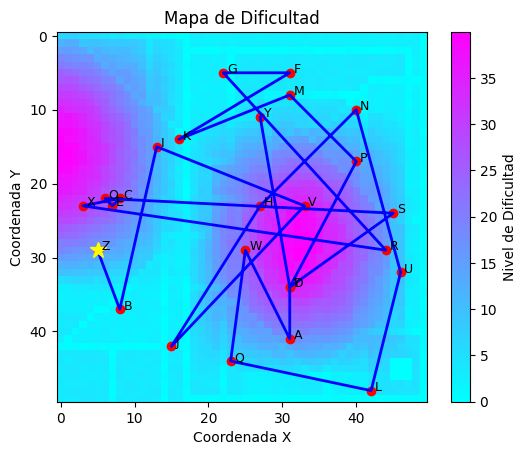

In [116]:
# Visualizar la matriz como un mapa de colores
plt.imshow(mapa, cmap='cool')  # Mapa de colores, puedes cambiar 'cool' por otros colormaps
plt.colorbar(label='Nivel de Dificultad')  # Añadir barra de colores
plt.title('Mapa de Dificultad')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Superponer los puntos de interés
plt.scatter(x_coordenadas, y_coordenadas, color='red', label='Puntos Importantes')

# Añadir los nombres de los puntos en el gráfico
for i in range(len(puntos)):
    plt.text(x_coordenadas[i] + 0.5, y_coordenadas[i], puntos[i], fontsize=9, ha='left')

# Dibujar el mejor camino encontrado
mejor_x_coordenadas = [x_coordenadas[i] for i in mejor_camino_v1]
mejor_y_coordenadas = [y_coordenadas[i] for i in mejor_camino_v1]

plt.plot(mejor_x_coordenadas, mejor_y_coordenadas, color='blue', linewidth=2, label='Mejor Camino')

plt.plot(x_reordenados[0], y_reordenados[0], color='yellow', marker='*', markersize=12)


# Mostrar el gráfico
plt.show()


In [127]:
import numpy as np
import time

# Distancia euclidiana entre dos puntos
def distancia_euclidiana(p1, p2):
    return np.linalg.norm(np.array(p2) - np.array(p1))

# Verificar si la distancia está dentro del límite permitido
def distancia_permitida(p_actual, p_objetivo, centro_tramo, radio):
    dist_a_centro = distancia_euclidiana(p_actual, centro_tramo)
    return dist_a_centro <= radio

# Función para calcular el ángulo entre dos vectores
def calcular_angulo(v1, v2):
    cos_angulo = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    return np.arccos(np.clip(cos_angulo, -1.0, 1.0))  # Aseguramos que cos_angulo esté en el rango [-1, 1]

# Coordenadas adyacentes para moverse (8 direcciones)
direcciones = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

# Movimiento ávaro con penalización basada en el ángulo de giro
def movimiento_avaro(p_actual, p_objetivo, mapa, visitadas, dist_original, p_anterior):
    x, y = p_actual
    mejor_posicion = None
    mejor_puntaje = float('inf')  # Queremos minimizar este puntaje
    peso_distancia = 2  # Peso para la distancia al objetivo, ajustable
    radio = dist_original / 2  # Radio es la mitad de la distancia original entre A y B
    centro_tramo = (np.array(p_actual) + np.array(p_objetivo)) / 2  # Centro del tramo

    # Iterar por las direcciones posibles
    for dx, dy in direcciones:
        nuevo_x, nuevo_y = x + dx, y + dy

        # Verificar si está dentro de los límites del mapa
        if 0 <= nuevo_x < mapa.shape[0] and 0 <= nuevo_y < mapa.shape[1]:
            nueva_posicion = (nuevo_x, nuevo_y)
            dificultad = mapa[nuevo_x, nuevo_y]
            dist_p_final = distancia_euclidiana(nueva_posicion, p_objetivo)

            # Verificar si cumple la restricción de distancia y que no haya sido visitada
            if distancia_permitida(nueva_posicion, p_objetivo, centro_tramo, radio) and tuple(nueva_posicion) not in visitadas:
                # Penalizar el zigzag basado en el ángulo de giro
                if p_anterior is not None:
                    delta_anterior = np.array(p_actual) - np.array(p_anterior)  # Vector del paso anterior
                    delta_nueva = np.array(nueva_posicion) - np.array(p_actual)  # Vector del paso nuevo
                    vector_objetivo = np.array(p_objetivo) - np.array(p_actual)  # Vector hacia el objetivo

                    # Calcular el ángulo entre el movimiento actual y el objetivo
                    angulo = calcular_angulo(delta_nueva, vector_objetivo)

                    # Penalización en función del ángulo
                    if angulo > np.pi:  # Si el ángulo es mayor a 180° (giro en contra del objetivo)
                        penalizacion_angulo = (angulo - np.pi) ** 2  # Penalización fuerte
                    else:  # Si el ángulo es menor a 180° (giro hacia el objetivo)
                        penalizacion_angulo = angulo ** 2  # Penalización suave
                else:
                    penalizacion_angulo = 0

                # Calcular el puntaje como combinación de dificultad, distancia y penalización
                puntaje = dificultad + peso_distancia * dist_p_final + penalizacion_angulo

                # Elegir la posición con el menor puntaje
                if puntaje < mejor_puntaje:
                    mejor_puntaje = puntaje
                    mejor_posicion = nueva_posicion

    return mejor_posicion

# Simulación de colonia de hormigas para encontrar la ruta más fácil entre A y B con restricciones
def colonia_local(punto_A, punto_B, mapa, n_hormigas, iteraciones, dist_original):
    mejor_ruta = [punto_A]  # Iniciar con el punto A
    mejor_dificultad = float('inf')
    tiempos_por_hormiga = []
    rutas_distancias = []

    for _ in range(iteraciones):
        for _ in range(n_hormigas):
            tiempo_inicio_hormiga = time.time()
            ruta_actual = [punto_A]
            p_actual = punto_A
            dificultad_total = 0
            visitadas = set()  # Conjunto para mantener las posiciones visitadas
            visitadas.add(tuple(p_actual))
            p_anterior = None  # Para calcular el zigzag

            # Moverse hasta llegar al punto B
            while not np.array_equal(p_actual, punto_B):
                p_actual = movimiento_avaro(p_actual, punto_B, mapa, visitadas, dist_original, p_anterior)

                if p_actual is None:
                    break  # No encontró camino válido

                ruta_actual.append(p_actual)
                visitadas.add(tuple(p_actual))  # Marcar como visitada
                dificultad_total += mapa[p_actual[0], p_actual[1]]
                p_anterior = ruta_actual[-2] if len(ruta_actual) > 1 else None  # Actualizamos p_anterior

            tiempo_fin_hormiga = time.time()
            tiempo_hormiga = tiempo_fin_hormiga - tiempo_inicio_hormiga
            tiempos_por_hormiga.append(tiempo_hormiga)
            rutas_distancias.append(dificultad_total)

            # Verificar si esta ruta es mejor que la mejor encontrada
            if p_actual is not None and np.array_equal(p_actual, punto_B) and dificultad_total < mejor_dificultad:
                mejor_ruta = ruta_actual
                mejor_dificultad = dificultad_total

    # Asegurar que el punto B esté en la ruta (en caso de optimización incompleta)
    if not np.array_equal(mejor_ruta[-1], punto_B):  # Usar np.array_equal para comparar arrays
        mejor_ruta.append(punto_B)

    return mejor_ruta, mejor_dificultad, tiempos_por_hormiga, rutas_distancias

# Función principal que recorre la ruta generada y aplica la colonia local entre cada par
def optimizar_ruta_original(ruta_original, coordenadas, mapa, n_hormigas, iteraciones):
    ruta_optima = []
    tiempos_por_hormiga_totales = []
    rutas_distancias_totales = []

    for i in range(len(ruta_original) - 1):
        # Usar los índices del mejor camino para obtener las coordenadas reales
        punto_A = coordenadas[ruta_original[i]]
        punto_B = coordenadas[ruta_original[i + 1]]

        # Aplicar la colonia local para encontrar el mejor camino entre A y B
        dist_original = distancia_euclidiana(punto_A, punto_B)
        mejor_ruta, _, tiempos_por_hormiga, rutas_distancias = colonia_local(punto_A, punto_B, mapa, n_hormigas, iteraciones, dist_original)

        # Añadir la mejor ruta al camino óptimo total
        ruta_optima.extend(mejor_ruta[:-1])  # Excluir el último punto para evitar duplicados
        tiempos_por_hormiga_totales.extend(tiempos_por_hormiga)
        rutas_distancias_totales.extend(rutas_distancias)

    # Añadir el último punto de la ruta original
    ruta_optima.append(coordenadas[ruta_original[-1]])

    return ruta_optima, tiempos_por_hormiga_totales, rutas_distancias_totales

# Parámetros para la colonia de hormigas local
n_hormigas = 10
iteraciones = 100

# Optimizar la ruta original (mejor_camino son índices, coordenadas son las coordenadas reales)
ruta_optima, tiempos_por_hormiga, rutas_distancias = optimizar_ruta_original(mejor_camino, coordenadas, mapa, n_hormigas, iteraciones)

# Calcular las estadísticas
mejor_distancia = min(rutas_distancias)
peor_distancia = max(rutas_distancias)
distancia_promedio = np.mean(rutas_distancias)
desviacion_estandar_distancia = np.std(rutas_distancias)
tiempo_total = sum(tiempos_por_hormiga)
tiempo_promedio_hormiga = np.mean(tiempos_por_hormiga)
cantidad_viajes = len(tiempos_por_hormiga)

# Mostrar resultados
print(f"Tiempo total: {tiempo_total:.2f} segundos")
print(f"Tiempo promedio por hormiga: {tiempo_promedio_hormiga:.4f} segundos")
print(f"Cantidad de viajes realizados: {cantidad_viajes}")
print(f"Cantidad de hormigas usadas: {n_hormigas}")
print(f"Distancia promedio de los caminos: {distancia_promedio:.4f}")
print(f"Desviación estándar de las distancias: {desviacion_estandar_distancia:.4f}")
print(f"El mejor camino encontrado tiene una distancia de {mejor_distancia:.4f}, lo que es {(mejor_distancia - distancia_promedio) / desviacion_estandar_distancia:.2f} desviaciones estándar por debajo del promedio.")


Tiempo total: 62.19 segundos
Tiempo promedio por hormiga: 0.0025 segundos
Cantidad de viajes realizados: 25000
Cantidad de hormigas usadas: 10
Distancia promedio de los caminos: 83.8224
Desviación estándar de las distancias: 101.1876
El mejor camino encontrado tiene una distancia de 0.0000, lo que es -0.83 desviaciones estándar por debajo del promedio.


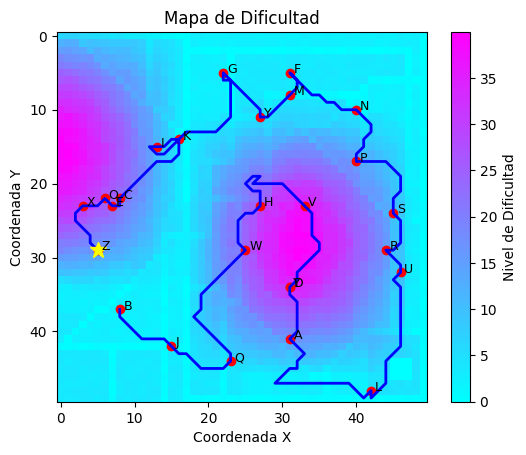

In [128]:
# Visualizar la matriz como un mapa de colores
plt.imshow(mapa, cmap='cool')  # Mapa de colores, puedes cambiar 'cool' por otros colormaps
plt.colorbar(label='Nivel de Dificultad')  # Añadir barra de colores
plt.title('Mapa de Dificultad')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Superponer los puntos de interés
plt.scatter(x_coordenadas, y_coordenadas, color='red', label='Puntos Importantes')

# Añadir los nombres de los puntos en el gráfico
for i in range(len(puntos)):
    plt.text(x_coordenadas[i] + 0.5, y_coordenadas[i], puntos[i], fontsize=9, ha='left')

# Dibujar el mejor camino encontrado
mejor_x_coordenadas = [pos[0] for pos in ruta_optima]  # Extraer la coordenada X de cada tupla
mejor_y_coordenadas = [pos[1] for pos in ruta_optima]  # Extraer la coordenada Y de cada tupla

plt.plot(mejor_x_coordenadas, mejor_y_coordenadas, color='blue', linewidth=2, label='Mejor Camino')

# Opcional: marcar el primer punto con una estrella
plt.plot(x_reordenados[0], y_reordenados[0], color='yellow', marker='*', markersize=12)

# Mostrar el gráfico
plt.show()
